# DATA2001 Assingment 1

## 1. Objectives 
1. Identify Missing Data and Handle
2. Visualise Data
3. Investigate Differences between Species 
4. Forcast using k-Means and PCA



# 2. Data Collection

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.


1. **studyName**- Sampling expedition from which data were collected, generated, etc.

2. **Sample Number** - an integer denoting the continuous numbering sequence for each sample

3. **Species**- a character string denoting the penguin species

4. **Region** - a character string denoting the region of Palmer LTER sampling grid

5. **Island** - a character string denoting the island near Palmer Station where samples were collected

6. **Stage** - a character string denoting reproductive stage at sampling

7. **Individual ID** - a character string denoting the unique ID for each individual in dataset

8. **Clutch Completion** - a character string denoting if the study nest observed with a full clutch, i.e., 2 eggs

9. **Date Egg**- a date denoting the date study nest observed with 1 egg (sampled)

10. **Culmen Length**- a number denoting the length of the dorsal ridge of a bird's bill (millimetres)

11. **Culmen Depth** - a number denoting the depth of the dorsal ridge of a bird's bill (millimetres)

12. **Flipper Length**- an integer denoting the length penguin flipper (millimetres)

13. **Body Mass**- an integer denoting the penguin body mass (grams)

14. **Sex** - a character string denoting the sex of an animal

15. **Delta 15 N**- a number denoting the measure of the ratio of stable isotopes 15N:14N

16. **Delta 13 C** - a number denoting the measure of the ratio of stable isotopes 13C:12C

17. **Comments** - a character string with text providing additional relevant information for data

### 2.1 Load penguins_iter.csv



In [553]:
# import pandas
import pandas as pd

#Supresss warnings for neatness
import warnings
warnings.filterwarnings("ignore")

#load data
url = 'https://raw.githubusercontent.com/benisrael29/data-sets/main/penguins_lter.csv'
df = pd.read_csv(url)

#view head
df.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [554]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [555]:
df.shape

(344, 17)

### Missing Values

In [556]:
print("Percentage of missing values by column:")
#Percentage missing values by column
df.isnull().sum()/len(df)*100

Percentage of missing values by column:


studyName               0.000000
Sample Number           0.000000
Species                 0.000000
Region                  0.000000
Island                  0.000000
Stage                   0.000000
Individual ID           0.000000
Clutch Completion       0.000000
Date Egg                0.000000
Culmen Length (mm)      0.581395
Culmen Depth (mm)       0.581395
Flipper Length (mm)     0.581395
Body Mass (g)           0.581395
Sex                     2.906977
Delta 15 N (o/oo)       4.069767
Delta 13 C (o/oo)       3.779070
Comments               92.441860
dtype: float64

In [557]:
rows = df.shape[0]
__ = df.drop('Comments', axis=1)
print('Rows missing values (excluding comments):', rows-__.dropna().shape[0])

Rows missing values (excluding comments): 19


In [558]:
#save comment row and sex
comments = df['Comments']
sex = df['Sex']
df = df.drop('Comments', axis=1)
df = df.drop('Sex', axis=1)


#replace all other missing values with the mean of the column 
df = df.fillna(df.median())

#fill missing comments with place holder
comments = comments.fillna('No comment')

#fill missing sex's with Unknown
sex = sex.fillna('Unknown')

#replace
df['Comments'] = comments
df['Sex'] = sex

### Missing values and imputation 

92% of the rows are missing comments. I am going to assume that we can keep these rows and replace the missing comments with a place holder as comments appear to be optional. There are 19 rows that are missing values exluding comments. These are all continuous data types. Replacing these with the median appears to be appropriate given the nature of the distribution of the missing values. In this case imputing with the median as opposed to the mean was done in hopes that the use of the median mitigates the effect of outliers on the analysis. However, median or mean would probably both be suitable in the context of k-means and PCA. 

# 3. Exploratory Data Analysis (EDA)

Including univariate and bivariate EDA for all relevant columns.  



## 3.1 Univariate

In [559]:
df.duplicated().sum()

0

Nice! No duplicates. 

**studyName**

Sampling expedition from which data were collected, generated, etc.

In [560]:
df['studyName'].unique()

array(['PAL0708', 'PAL0809', 'PAL0910'], dtype=object)

Data appears to be a combination of three seperate studies.  

In [561]:
#import graphing tool
import matplotlib as plt

<AxesSubplot:>

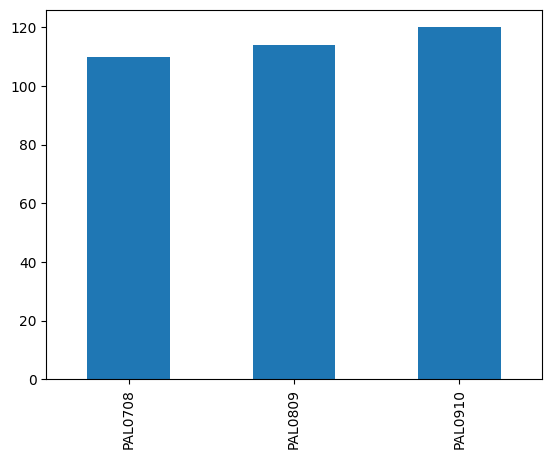

In [562]:
df['studyName'].value_counts(sort=False).plot.bar()

The distribution of instances between the studies is roughly similar with all between 100-120 data points. 

**Sample Number**


An integer denoting the continuous numbering sequence for each sample

In [563]:
df['Sample Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152])

sampleNumber is not unique with each study starting from 1. 

**Species**

A character string denoting the penguin species.

In [564]:
#Number of unique species
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

<AxesSubplot:ylabel='# of Instances'>

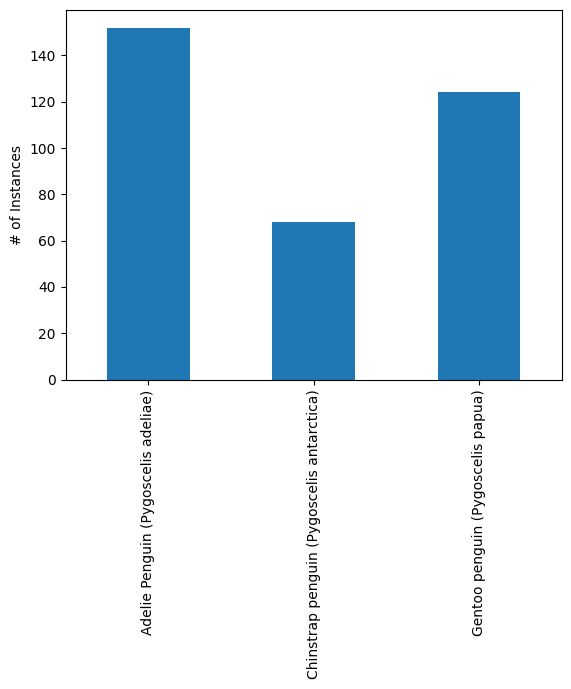

In [565]:
#Plot of instances of each species
df['Species'].value_counts(sort=False).plot.bar(ylabel = '# of Instances')

There are 152 Adelie, 124 Gentoo, and 68 Chinstrap penguins. The differance in sample sizes may cause over or under sampling errors in future analysis with this data set. This could be addressed with random sampling. 

**Region**

A character string denoting the region of Palmer LTER sampling grid

In [566]:
df['Region'].unique()

array(['Anvers'], dtype=object)

Only one region. 

**Island**


A character string denoting the island near Palmer Station where samples were collected.

In [567]:
df['Island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

<AxesSubplot:ylabel='# of Instances'>

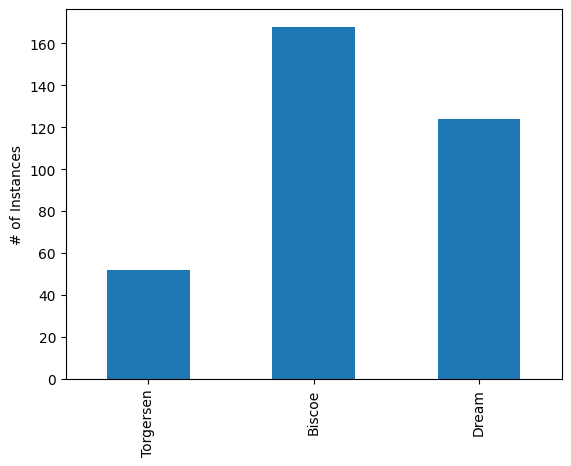

In [568]:
df['Island'].value_counts(sort=False).plot.bar(ylabel='# of Instances')

Biscoe had highest number of penguins sampled. The differances between island instances could be some sampling bias or could be indicative of conditions on the islands, its unclear. 

**Stage**

 A character string denoting reproductive stage at sampling

In [569]:
df['Stage'].unique()

array(['Adult, 1 Egg Stage'], dtype=object)

Only one stage for all instances. This variable therefore provides no variance for analysis. 

**Individual ID**

A character string denoting the unique ID for each individual in dataset

In [570]:
df['Individual ID'].unique().shape

(190,)

Individual ID is not unique as there are only 90 unique IDs but 344 rows in the data set. 

**Clutch Completion**

A character string denoting if the study nest observed with a full clutch, i.e., 2 eggs

In [571]:
df['Clutch Completion'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:>

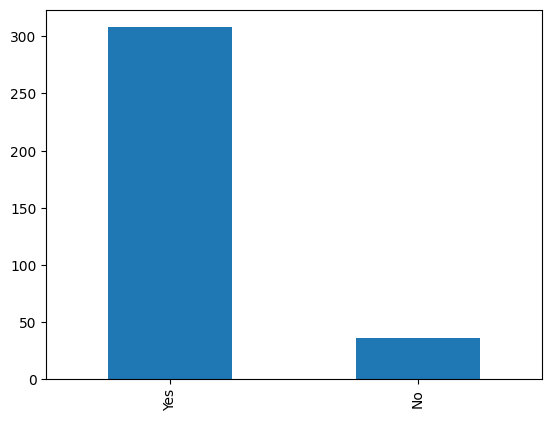

In [572]:
df['Clutch Completion'].value_counts(sort=False).plot.bar()

~13% of have not completed their nests. Worth considering the time which these observations where taken as a potential souce of bias in this variable. For example if sampling was done over the course of a season then samples toward the end of the season may be more likely to have completed the nest.

### Sex
A character string denoting the sex of an animal

In [573]:
df['Sex'].unique()

array(['MALE', 'FEMALE', 'Unknown', '.'], dtype=object)

Going to assume that '.' is a typo and I am going to replace it with unkown.

In [574]:
df=df.replace('.', 'Unknown')

<AxesSubplot:>

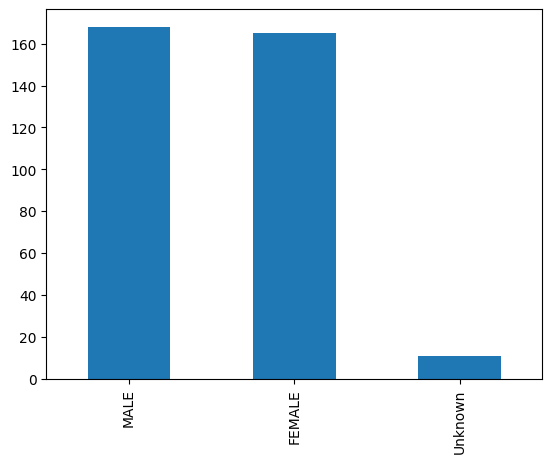

In [575]:
df['Sex'].value_counts(sort=False).plot.bar()

Roughly equal numbers of male and female penguins across the study. 

### Comments 
A character string with text providing additional relevant information for data

<AxesSubplot:>

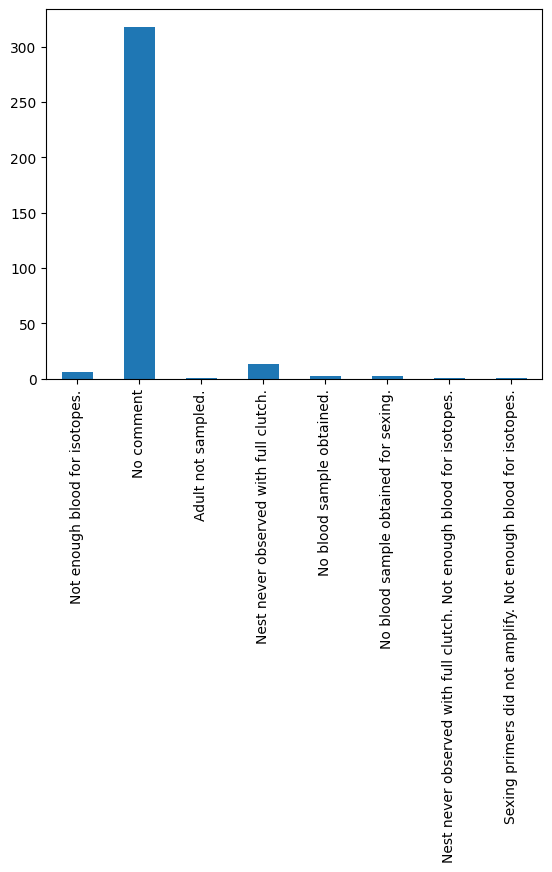

In [576]:
df['Comments'].value_counts(sort=False).plot.bar()

**Numerical Data**

Culmen Length: A number denoting the length of the dorsal ridge of a bird's bill (millimetres)

Culmen Depth: a number denoting the depth of the dorsal ridge of a bird's bill (millimetres)

Flipper Length: an integer denoting the length penguin flipper (millimetres)

Body Mass: an integer denoting the penguin body mass (grams)

Delta 15 N: a number denoting the measure of the ratio of stable isotopes 15N:14N

Delta 13 C: a number denoting the measure of the ratio of stable isotopes 13C:12C

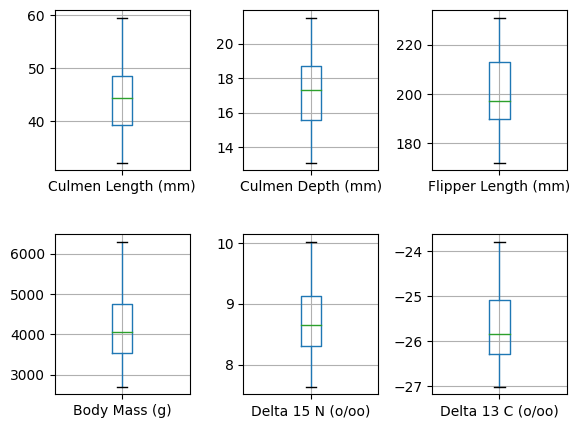

In [577]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3) # create 2x2 array of subplots

df.boxplot(column='Culmen Length (mm)', ax=axes[0,0])
df.boxplot(column='Culmen Depth (mm)', ax=axes[0,1])
df.boxplot(column='Flipper Length (mm)', ax=axes[0,2])
df.boxplot(column='Body Mass (g)', ax=axes[1,0])
df.boxplot(column='Delta 15 N (o/oo)', ax=axes[1,1])
df.boxplot(column='Delta 13 C (o/oo)', ax=axes[1,2])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

**Species Mean and STD**

In [578]:
group=df.drop('Sample Number', axis=1)
species_group=group.groupby('Species')
species_group.describe()

Culmen Length (mm)                                                         Culmen Depth (mm)                                                         Flipper Length (mm)                                                          Body Mass (g)                                                                  Delta 15 N (o/oo)                                                                      Delta 13 C (o/oo)                                                                          
                                                       count       mean       std   min     25%    50%     75%   max             count       mean       std   min     25%    50%     75%   max               count        mean       std    min    25%    50%    75%    max         count         mean         std     min     25%     50%     75%     max             count      mean       std      min       25%       50%       75%       max             count       mean       std       min        25%        50%        75%       max
Species                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
Adelie Penguin (Pygoscelis adeliae)                    152.0  38.828618  2.693957  32.1  36.775  38.80  40.800  46.0             152.0  18.339474  1.215581  15.5  17.475  18.40  19.000  21.5               152.0  190.000000  6.542778  172.0  186.0  190.0  195.0  210.0         152.0  3702.960526  457.922662  2850.0  3350.0  3700.0  4000.0  4775.0             152.0  8.844729  0.413922  7.69778  8.578470  8.850065  9.120525   9.79532             152.0 -25.806316  0.566408 -26.78958 -26.217335 -25.884770 -25.330830 -23.90309
Chinstrap penguin (Pygoscelis antarctica)               68.0  48.833824  3.339256  40.9  46.350  49.55  51.075  58.0              68.0  18.420588  1.135395  16.4  17.500  18.45  19.400  20.8                68.0  195.823529  7.131894  178.0  191.0  196.0  201.0  212.0          68.0  3733.088235  384.335081  2700.0  3487.5  3700.0  3950.0  4800.0              68.0  9.345806  0.375777  8.47173  9.082998  9.370840  9.618898  10.02544              68.0 -24.546542  0.238809 -25.14550 -24.685153 -24.572375 -24.400333 -23.78767
Gentoo penguin (Pygoscelis papua)                      124.0  47.480242  3.081540  40.9  45.275  47.25  49.525  59.6             124.0  15.000806  0.999146  13.1  14.200  15.00  15.725  17.3               124.0  217.024194  6.708160  197.0  212.0  216.0  221.0  231.0         124.0  5067.741935  510.447498  3950.0  4700.0  5000.0  5500.0  6300.0             124.0  8.251904  0.267317  7.63220  8.103705  8.256790  8.453098   8.83352             124.0 -26.179624  0.536008 -27.01854 -26.689417 -26.213350 -25.668120 -25.00169

Chinstrap penguins have smaller culmen length but similar depth to Adelie and Gentoo. Flipper length is slightly larger for Gentoo penguins but similar for other species. Gentoo also have significantly larger body masses then Chinstrap and Adelie species which are similar to each other. Levels of delta 15 N appear slightly elevated in Chinstrap penguins. There is no clear trend in Delta 13 C ratios between species. 

## 3.2 Bivariate 

 **Species vs Island**


In [579]:
import plotly.express as px

px.bar( data_frame=df, y = 'Island', 
        facet_row='Species',facet_row_spacing=0.10, 
        pattern_shape='Species',
        color='Species', 
        color_discrete_map={'Adelie Penguin (Pygoscelis adeliae)':'rgb(251,117,4)', 'Chinstrap penguin (Pygoscelis antarctica)':'rgb(167,98,188)', 'Gentoo penguin (Pygoscelis papua)':'rgb(4,115,116)'},
        width=800,height=900 )

Some penguins only live on some island whilst other appear on two. 

**Species vs Sex**

In [580]:
fig =px.bar( data_frame=df, y = 'Sex',
facet_row='Species',facet_row_spacing=0.10,
pattern_shape='Species',
color='Species',
color_discrete_map={'Adelie Penguin (Pygoscelis adeliae)':'rgb(251,117,4)', 'Chinstrap penguin (Pygoscelis antarctica)':'rgb(167,98,188)', 'Gentoo penguin (Pygoscelis papua)':'rgb(4,115,116)'},
width=800,height=900 )

fig.show()


Most species had near equal male/female numbers with a minor increase in male numbers in the Gentoo species. 

**Body Mass vs Flipper Length**

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

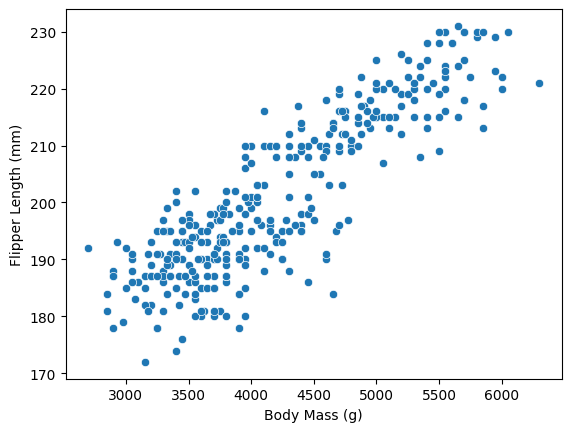

In [581]:
sns.scatterplot(data=df, x='Body Mass (g)', y='Flipper Length (mm)')

Flipper length and body mass appear to be linearly correlated. This is probably expected as larger flippers would probably weigh more.  

**Culmen Length vs Culmen Depth**

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

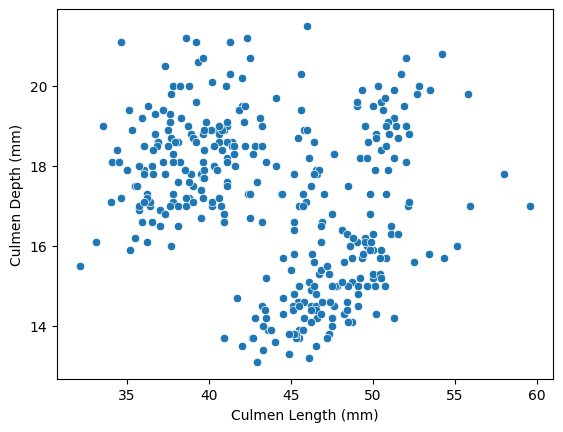

In [582]:
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)')

No clear relationship between culmen length and depth. 

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

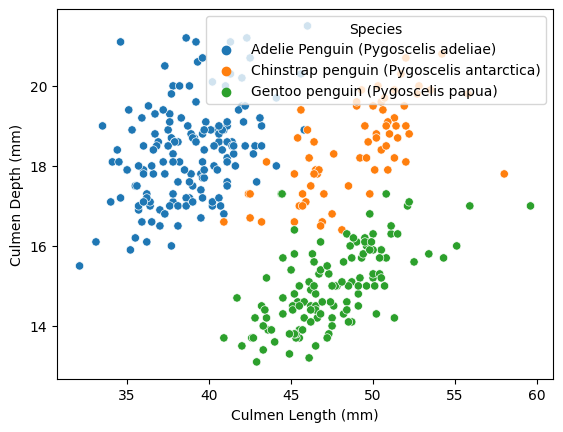

In [583]:
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species')

When colored with species it is clear that each species as a particular depth/length ratio. 

**Body Mass vs Species**

In [584]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

trace_bm = []
color =['darkorange','mediumorchid','teal']
for var,col in zip(df.Species.unique(),color):
    trace = go.Violin(x = df['Species'][df['Species']==var], y =df['Body Mass (g)'][df['Species']==var],
                    box_visible=True,
                    meanline_visible=True,
                    points='all',
                    line_color=col,
                    name=var)
    trace_bm.append(trace)
trace_flipper = []
for var,col in zip(df.Species.unique(),color):
    trace2 = go.Violin(x = df['Species'][df['Species']==var], y =df['Flipper Length (mm)'][df['Species']==var],
             box_visible=True,
             meanline_visible=True,
             points='all',
             line_color=col,
        )
    trace_flipper.append(trace2)
fig = make_subplots(rows=2, cols=1, subplot_titles=("Body Mass (g)","Flipper Length (mm)")) 
for i in trace_bm:
    fig.add_trace(i,row=1,col=1)
for j in trace_flipper:    
    fig.add_trace(j,row=2,col=1)
fig.update_layout(showlegend = False, title = 'Violin Plots',height=800)
fig.show()

Gentoo tend to be heavier and have larger flippers than their related species. 

# 4. Correlations

Text(0.5, 1.0, 'Adelie Penguin Correlates')

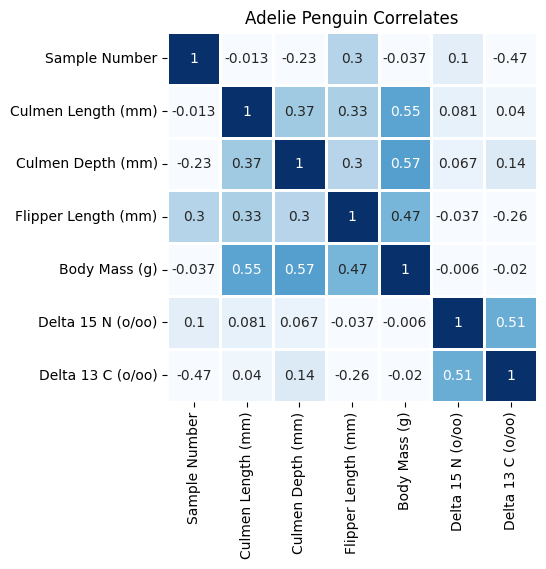

In [585]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

groups = df.groupby('Species')
#Seperate species
adelie = df[df['Species'] == 'Adelie Penguin (Pygoscelis adeliae)'].select_dtypes([np.number])
chinstrap = df[df['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)'].select_dtypes([np.number])
gentoo = df[df['Species'] == 'Gentoo penguin (Pygoscelis papua)'].select_dtypes([np.number])

#Create correlation matrix
corr = adelie.corr()
#plot
fig, axes = plt.subplots(1,1)
ax = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, annot=True,cmap='Blues')
ax.set_title("Adelie Penguin Correlates")

Text(0.5, 1.0, 'Chinstrap Penguin Correlates')

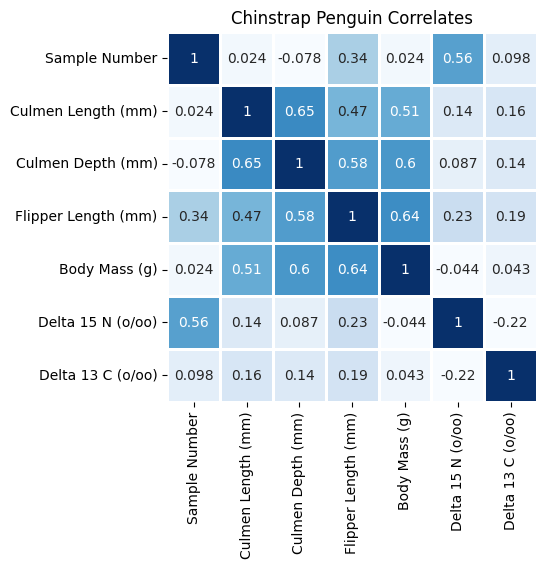

In [586]:
#Correlate and plot
corr = chinstrap.corr()
ax = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, annot=True, square=True, cmap='Blues')
ax.set_title("Chinstrap Penguin Correlates")

Text(0.5, 1.0, 'Chinstrap Penguin Correlates')

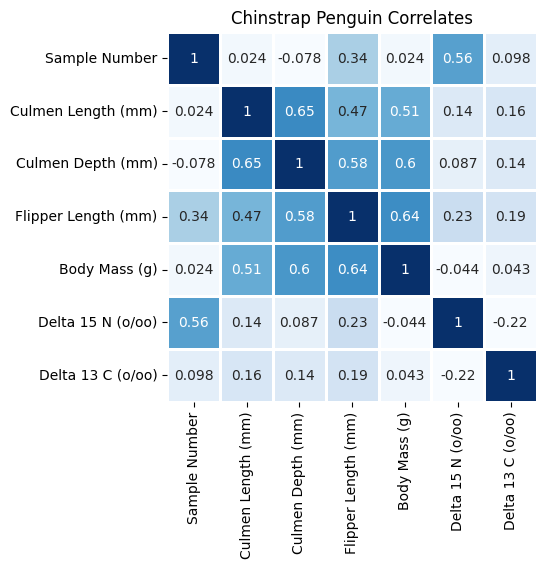

In [587]:
# Correlate and plot
corr = chinstrap.corr()
ax = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, annot=True, square=True, cmap='Blues')
ax.set_title("Chinstrap Penguin Correlates")

No highly correlated variables within each species. Body mass, flipper length, culmen length and depth appear slightly positivly correlated. Which makes sense as the size of the penguin would effect all of these. 

# 5. K-means Clustering

### What is Kmeans Clustering?

K-means clustering is one of the more common clustering algorithms. It is used to partition observations into groups such that each observation is closer to its centroid than any other. The output of the algorithm is a classification model which can be used to group new observations. 

The algorithm takes the following steps:

1. Randomly initialise a given number of clusters in the data space. 
2. Iterate through each data point and assign it to the nearest cluster. 
3. Move each centroid to the mean of all the points assigned to it. 
4. Repeat until centroids converge ie. do not move. 

![Kmeans Clustering](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

***Clustering algorithm in action source: en.wikipedia.org/wiki/K-means_clustering***


 **K-means Analysis**

Data that is not numerical has to be enumerated to be used in the model.

In [588]:
#Remove and save species column
y = df['Species']
x=df.loc[:, df.columns != 'Species']
#enumerate non numeric columns 
x = pd.get_dummies(x)
x.head()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studyName_PAL0708,studyName_PAL0809,studyName_PAL0910,Region_Anvers,Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Individual ID_N100A1,Individual ID_N100A2,Individual ID_N10A1,Individual ID_N10A2,Individual ID_N11A1,Individual ID_N11A2,Individual ID_N12A1,Individual ID_N12A2,Individual ID_N13A1,Individual ID_N13A2,Individual ID_N14A1,Individual ID_N14A2,Individual ID_N15A1,Individual ID_N15A2,Individual ID_N16A1,Individual ID_N16A2,Individual ID_N17A1,Individual ID_N17A2,Individual ID_N18A1,Individual ID_N18A2,Individual ID_N19A1,Individual ID_N19A2,Individual ID_N1A1,Individual ID_N1A2,Individual ID_N20A1,Individual ID_N20A2,Individual ID_N21A1,Individual ID_N21A2,Individual ID_N22A1,Individual ID_N22A2,Individual ID_N23A1,Individual ID_N23A2,Individual ID_N24A1,Individual ID_N24A2,Individual ID_N25A1,Individual ID_N25A2,Individual ID_N26A1,Individual ID_N26A2,Individual ID_N27A1,Individual ID_N27A2,Individual ID_N28A1,Individual ID_N28A2,Individual ID_N29A1,Individual ID_N29A2,Individual ID_N2A1,Individual ID_N2A2,Individual ID_N30A1,Individual ID_N30A2,Individual ID_N31A1,Individual ID_N31A2,Individual ID_N32A1,Individual ID_N32A2,Individual ID_N33A1,Individual ID_N33A2,Individual ID_N34A1,Individual ID_N34A2,Individual ID_N35A1,Individual ID_N35A2,Individual ID_N36A1,Individual ID_N36A2,Individual ID_N37A1,Individual ID_N37A2,Individual ID_N38A1,Individual ID_N38A2,Individual ID_N39A1,Individual ID_N39A2,Individual ID_N3A1,Individual ID_N3A2,Individual ID_N40A1,Individual ID_N40A2,Individual ID_N41A1,Individual ID_N41A2,Individual ID_N42A1,Individual ID_N42A2,Individual ID_N43A1,Individual ID_N43A2,Individual ID_N44A1,Individual ID_N44A2,Individual ID_N45A1,Individual ID_N45A2,Individual ID_N46A1,Individual ID_N46A2,Individual ID_N47A1,Individual ID_N47A2,Individual ID_N48A1,Individual ID_N48A2,Individual ID_N49A1,Individual ID_N49A2,Individual ID_N4A1,Individual ID_N4A2,Individual ID_N50A1,Individual ID_N50A2,Individual ID_N51A1,Individual ID_N51A2,Individual ID_N53A1,Individual ID_N53A2,Individual ID_N54A1,Individual ID_N54A2,Individual ID_N55A1,Individual ID_N55A2,Individual ID_N56A1,Individual ID_N56A2,Individual ID_N58A1,Individual ID_N58A2,Individual ID_N5A1,Individual ID_N5A2,Individual ID_N60A1,Individual ID_N60A2,Individual ID_N61A1,Individual ID_N61A2,Individual ID_N62A1,Individual ID_N62A2,Individual ID_N63A1,Individual ID_N63A2,Individual ID_N64A1,Individual ID_N64A2,Individual ID_N65A1,Individual ID_N65A2,Individual ID_N66A1,Individual ID_N66A2,Individual ID_N67A1,Individual ID_N67A2,Individual ID_N68A1,Individual ID_N68A2,Individual ID_N69A1,Individual ID_N69A2,Individual ID_N6A1,Individual ID_N6A2,Individual ID_N70A1,Individual ID_N70A2,Individual ID_N71A1,Individual ID_N71A2,Individual ID_N72A1,Individual ID_N72A2,Individual ID_N73A1,Individual ID_N73A2,Individual ID_N74A1,Individual ID_N74A2,Individual ID_N75A1,Individual ID_N75A2,Individual ID_N76A1,Individual ID_N76A2,Individual ID_N77A1,Individual ID_N77A2,Individual ID_N78A1,Individual ID_N78A2,Individual ID_N79A1,Individual ID_N79A2,Individual ID_N7A1,Individual ID_N7A2,Individual ID_N80A1,Individual ID_N80A2,Individual ID_N81A1,Individual ID_N81A2,Individual ID_N82A1,Individual ID_N82A2,Individual ID_N83A1,Individual ID_N83A2,Individual ID_N84A1,Individual ID_N84A2,Individual ID_N85A1,Individual ID_N85A2,Individual ID_N86A1,Individual ID_N86A2,Individual ID_N87A1,Individual ID_N87A2,Individual ID_N88A1,Individual ID_N88A2,Individual ID_N89A1,Individual ID_N89A2,Individual ID_N8A1,Individual ID_N8A2,Individual ID_N90A1,Individual ID_N90A2,Individual ID_N92A1,Individual ID_N92A2,Individual ID_N93A1,Individual ID_N93A2,Individual ID_N94A1,Individual ID_N94A2,Individual ID_N95A1,Individual ID_N95A2,Individual ID_N96A1,Individual ID_N96A2,Individual ID_N98A1,Individual ID_N98A2,Individual ID_N99A1,Individual ID

In [589]:
from sklearn.cluster import KMeans

#Generate model and fit
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(n_clusters=3)

In [590]:
#Predict 
labels=model.predict(x)

In [591]:
#Compute cross tabulation
matrix = pd.DataFrame({'labels': labels, 'Species': y})
ct = pd.crosstab(matrix['labels'], matrix['Species'])
ct


Species,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua)
labels,,,
0,41,16,51
1,0,0,72
2,111,52,1


In [592]:
#save cluster positions. 
model.cluster_centers_
culmen_length_centres = model.cluster_centers_[:,1]
culmen_depth_centres = model.cluster_centers_[:,2]

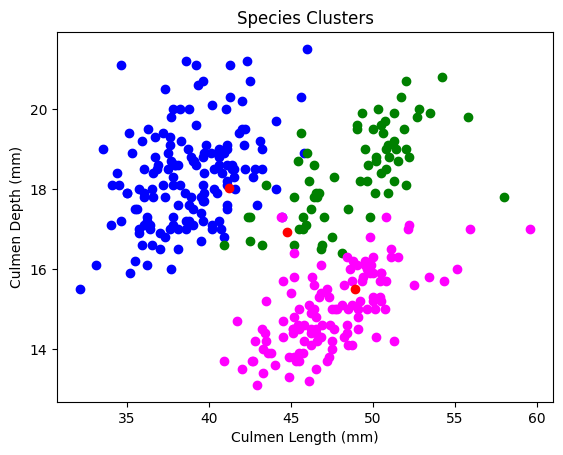

In [593]:
import matplotlib.pyplot as plt

#Seperate species
adelie = df[df['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
chinstrap = df[df['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']
gentoo = df[df['Species'] == 'Gentoo penguin (Pygoscelis papua)']

#Graph species with centroids. 
plt.scatter(adelie['Culmen Length (mm)'],adelie['Culmen Depth (mm)'],c='blue')
plt.scatter(chinstrap['Culmen Length (mm)'],chinstrap['Culmen Depth (mm)'],c='green')
plt.scatter(gentoo['Culmen Length (mm)'],gentoo['Culmen Depth (mm)'],c='magenta')
plt.scatter(culmen_length_centres,culmen_depth_centres,c='red')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Species Clusters')
plt.show()

**Choosing the Number of Clusters**

One way of choosing the optimal number of clusters to use the elbow method. This involves running the k-means over a range of k values and computing the error using a given error function. The optimal number of clusters can then be derrived from the graph as the point at which the clustering score declines the most ( forming an 'elbow').  

In this case the error function used is distortion. Distortion is the sum of square distances from each point to its assinged center. 

In [594]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
  
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_
print('Distortion values for cluster:')
for key, val in mapping1.items():
    print(f'{key} : {val}')

Distortion values for cluster:
1 : 676.1081986625233
2 : 351.44781078110043
3 : 252.76800159818768
4 : 188.13845975642977
5 : 157.26284748032865
6 : 140.8999193047097
7 : 123.15704678603231
8 : 107.55063728833902
9 : 98.33235889136606


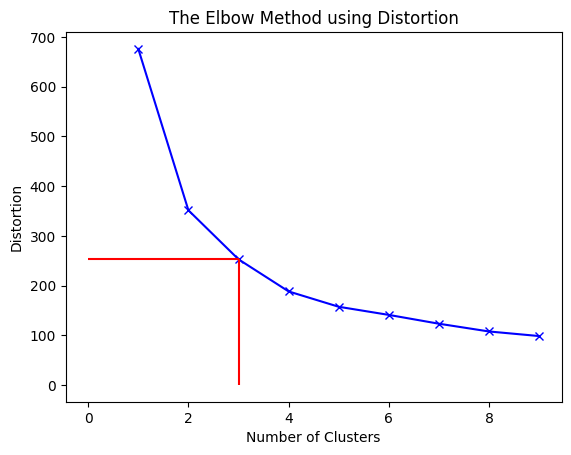

In [595]:
fig, ax = plt.subplots()
ax.plot(K, distortions, 'bx-')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Distortion')
ax.set_title('The Elbow Method using Distortion')

ax.hlines(y=252.76800159818768, xmin=0, xmax=3, color='r')
ax.vlines(x=3, ymin=0, ymax=252.76800159818768, color='r')
plt.show()

The chosen elbow point can be seen in red and occurs at a distortion of ~252.

# 6. PCA

PCA is a dimensionality reduction technique. It is used to simplify data whilst retaining the critical information. PCA is sensitive to the scale of the features. In this case the data was normalised to account for this. 

In [596]:
#Drop columns that are non unique or artifacts of previous analysis
y=df['Species']
dumb_data=df.drop(['Sample Number', 'Species', 'Individual ID','Region','Date Egg','Stage'], axis=1)

#Enumerate non-continuous data
dumb_data = pd.get_dummies(dumb_data)

#normalisation 
normalized_bumb_df=(dumb_data-dumb_data.mean())/dumb_data.std()
normalized_bumb_df.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studyName_PAL0708,studyName_PAL0809,studyName_PAL0910,Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Comments_Adult not sampled.,Comments_Nest never observed with full clutch.,Comments_Nest never observed with full clutch. Not enough blood for isotopes.,Comments_No blood sample obtained for sexing.,Comments_No blood sample obtained.,Comments_No comment,Comments_Not enough blood for isotopes.,Comments_Sexing primers did not amplify. Not enough blood for isotopes.,Sex_FEMALE,Sex_MALE,Sex_Unknown
0,-0.886331,0.786144,-1.418475,-0.563804,-0.143686,-0.181790,1.456396,-0.703002,-0.73086,-0.975587,-0.749665,2.366233,-0.341384,0.341384,-0.053916,-0.197891,-0.053916,-0.076361,-0.076361,-3.492165,7.494636,-0.053916,-0.958701,1.022044,-0.181486
1,-0.812853,0.125931,-1.061939,-0.501280,0.405960,1.279795,1.456396,-0.703002,-0.73086,-0.975587,-0.749665,2.366233,-0.341384,0.341384,-0.053916,-0.197891,-0.053916,-0.076361,-0.076361,0.285523,-0.133041,-0.053916,1.040046,-0.975587,-0.181486
2,-0.665896,0.430645,-0.420174,-1.189041,-0.669360,0.460472,1.456396,-0.703002,-0.73086,-0.975587,-0.749665,2.366233,-0.341384,0.341384,-0.053916,-0.197891,-0.053916,-0.076361,-0.076361,0.285523,-0.133041,-0.053916,1.040046,-0.975587,-0.181486
3,0.096440,0.075145,-0.277559,-0.188662,-0.143686,-0.181790,1.456396,-0.703002,-0.73086,-0.975587,-0.749665,2.366233,-0.341384,0.341384,18.493321,-0.197891,-0.053916,-0.076361,-0.076361,-3.492165,-0.133041,-0.053916,-0.958701,-0.975587,5.494063
4,-1.327200,1.090858,-0.562788,-0.938946,0.067373,0.471713,1.456396,-0.703002,-0.73086,-0.975587,-0.749665,2.366233,-0.341384,0.341384,-0.053916,-0.197891,-0.053916,-0.076361,-0.076361,0.285523,-0.133041,-0.053916,1.040046,-0.975587,-0.181486


In [597]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(normalized_bumb_df)

fig = px.scatter(components, x=0, y=1, color=df['Species'])
fig.show()

Plot of two components colored for species shows good seperation between chinstrap and gentoo species with less distinction for adelie. Total exaplained variance for these two dimension is approximatly 31%. 

In [598]:
pca = PCA(n_components=3)
components = pca.fit_transform(normalized_bumb_df)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

Plot of 3 principle components with 41% explained variance. 

In [599]:
pca = PCA()
pca.fit(normalized_bumb_df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

**Limitations of PCA**

Some of the limiations of using PCA include: non-robustness to outliers, sensitivity to scale, assumption of linear relationships between features. Some of these limitions are addressed in the preprosessing of the data ie. normalisation and outlier detection in EDA. These practices no doubt improve accurcy of the components. 